# Bandit Problem

In [44]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
# Include your imports here, if any are used.

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [45]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [46]:
bandits[0].pullLever()

0.6715511383144899

## Greedy algorithm Implementation

In [47]:
def run_greedy():
    n = len(bandits)
    Q = np.zeros(n)
    N = np.zeros(n)
    rewards = []
    for i in range(1000):
        a = int(np.argmax(Q))
        r = bandits[a].pullLever()
        rewards.append(r)
        N[a] += 1
        Q[a] +=(r-Q[a])/N[a]
    return rewards


Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

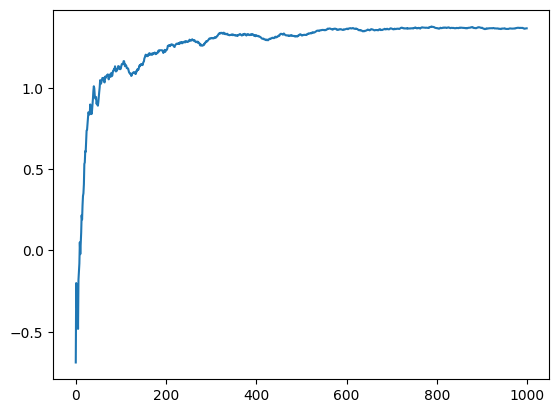

In [48]:
rewards_greedy = run_greedy()
avg= np.cumsum(rewards_greedy) / (np.array(range(1,len(rewards_greedy)+ 1)))

plt.figure()
plt.plot(avg)
plt.show()


## $\epsilon$-greedy Algorithm

In [49]:
def run_epsilon_greedy(epsilon):
    n = len(bandits)
    Q = np.zeros(n)
    N = np.zeros(n)
    rewards = []
    for i in range(1000):
        if random.random() < epsilon:
            a =random.randrange(n)
        else:
            a = int(np.argmax(Q))
        r = bandits[a].pullLever()
        rewards.append(r)
        N[a] += 1
        Q[a] +=(r-Q[a])/N[a]
    return rewards


Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

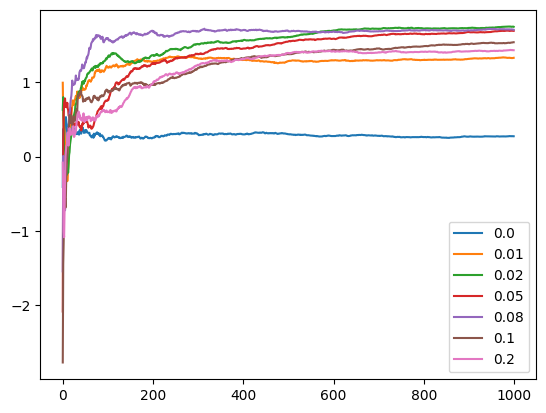

In [50]:
epss= [0.0, 0.01,0.02, 0.05,0.08, 0.1,0.2]
plt.figure()
for eps in epss:
    rewards = run_epsilon_greedy(eps)
    avg = np.cumsum(rewards) /(np.array(range(1,len(rewards) +1)))
    plt.plot(avg, label=f"{eps}")
plt.legend()
plt.show()


## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

[0.0, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3]
[np.float64(1.366622885830028), np.float64(1.3833745241438609), np.float64(0.9186211040030853), np.float64(1.7033224718002664), np.float64(1.765086751401462), np.float64(1.6588909759508184), np.float64(1.517926097035142), np.float64(1.4645629478189481), np.float64(1.30213056357446)]
0.05


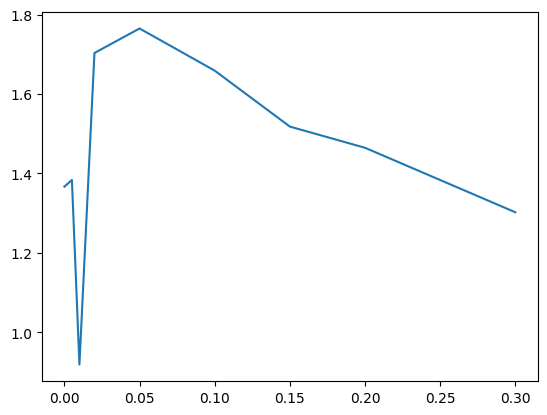

In [51]:
epss = [0.0, 0.005, 0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.3]
final_avgs = []
for eps in epss:
    rewards = run_epsilon_greedy(eps)
    avg = np.cumsum(rewards) / (np.array(range(1,len(rewards) +1)))
    final_avgs.append(avg[-1])
best_eps = epss[int(np.argmax(final_avgs))]
print(epss)
print(final_avgs)
print(best_eps)

plt.figure()
plt.plot(epss, final_avgs)
plt.show()


## Optimistic Initial Values

In [52]:
def run_optimistic_greedy():
    n = len(bandits)
    Q = np.ones(n) * (10.0)
    N = np.zeros(n)
    rewards = []
    for i in range(1000):
        a = int(np.argmax(Q))
        r = bandits[a].pullLever()
        rewards.append(r)
        N[a] += 1
        Q[a] +=(r-Q[a])/N[a]
    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

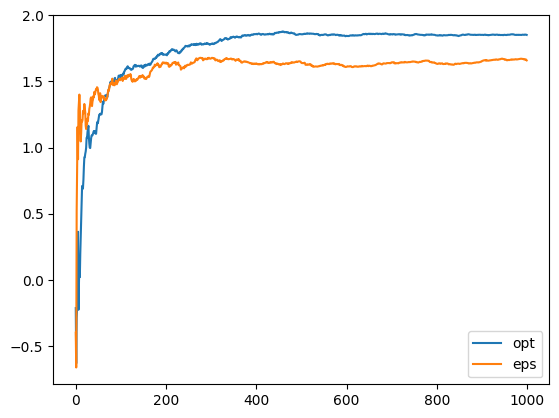

In [59]:
opt = run_optimistic_greedy()
avg_opt = np.cumsum(opt) / (np.array(range(1,len(opt) +1)))
eps= run_epsilon_greedy(0.1)
avg_eps = np.cumsum(eps) / (np.array(range(1,len(eps) +1)))

plt.figure()
plt.plot(avg_opt, label="opt")
plt.plot(avg_eps, label="eps")
plt.legend()
plt.show()


## Upper Confidence Bound (UCB)

In [56]:
def run_ucb(c):
    n = len(bandits)
    Q = np.zeros(n)
    N = np.zeros(n)
    rewards = []
    for i in range(1, 1001):
        ucb= Q +c *np.sqrt(np.log(i)/N)
        a = int(np.argmax(ucb))
        r = bandits[a].pullLever()
        rewards.append(r)
        N[a]+= 1
        Q[a] +=(r-Q[a])/N[a]
    return rewards
